<a href="https://colab.research.google.com/github/ibloo1703/TP1_MachineLearning/blob/main/MachineLearning_TP3_True_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/TP3_Machine_Learning/cats_and_dogs

test  train


In [ ]:
%cd /content/drive/MyDrive/TP3_Machine_Learning/cats_and_dogs/train

UsageError: Line magic function `%cd /content/drive/MyDrive/TP3_Machine_Learning/cats_and_dogs/train` not found.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/TP3_Machine_Learning/cats_and_dogs/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 557 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/TP3_Machine_Learning/cats_and_dogs/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 140 images belonging to 2 classes.


#Test modèle 1

model = keras.Sequential(
    [

        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

#Test modèle 2

model = keras.Sequential(
    [

        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop'
              metrics=['accuracy'])

model.summary()

#Test modèle VGG16

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))



In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history = model.fit(
    train_generator,
    #steps_per_epoch=18,
    epochs=10,
    validation_data = test_generator,
    #validation_steps=50
)


Epoch 1/10
18/18 [==============================] - 1524s 84s/step - loss: 0.9405 - accuracy: 0.4973 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 1443s 80s/step - loss: 0.6937 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 1484s 83s/step - loss: 0.6949 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 1444s 80s/step - loss: 0.6933 - accuracy: 0.4811 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 1424s 79s/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 1412s 79s/step - loss: 0.6935 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 1354s 75s/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5000

5/5 - 90s - loss: 0.6932 - accuracy: 0.5000 - 90s/epoch - 18s/step
Test accuracy: 0.5
5/5 [==============================] - 90s 17s/step
Confusion matrix:
[[ 0 70]
 [ 0 70]]


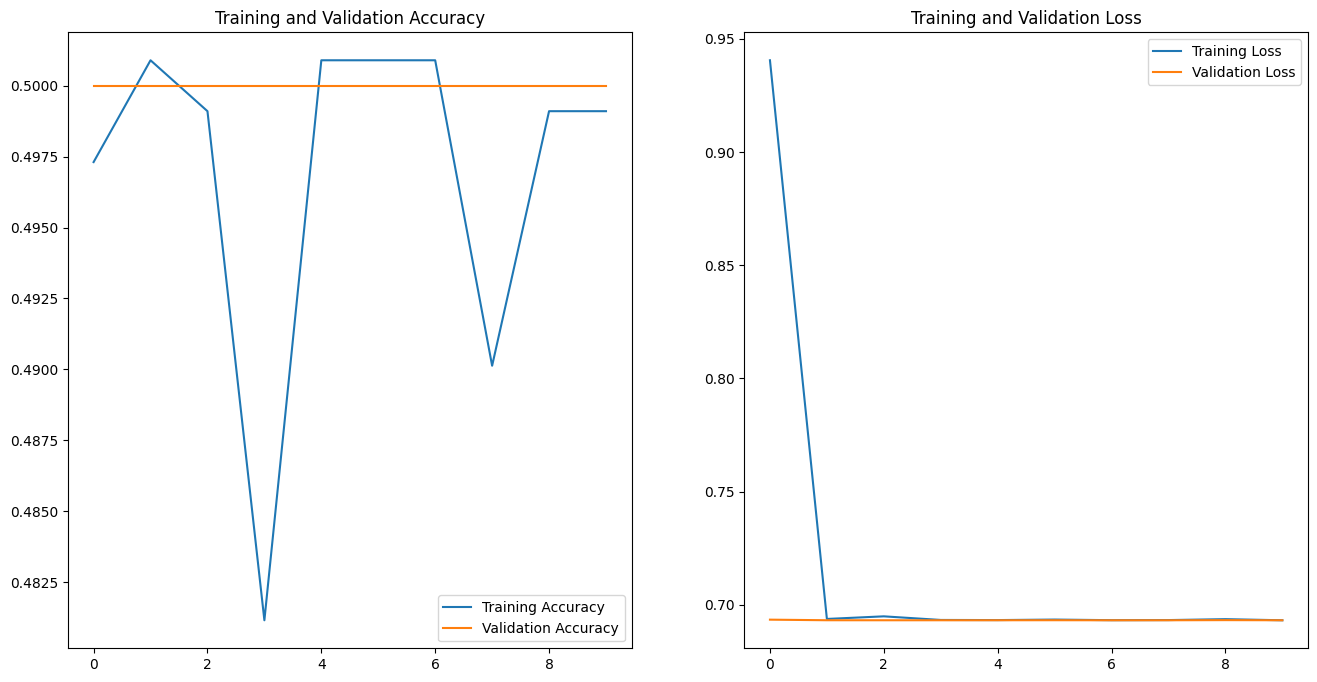

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

# Get the true labels and predicted labels for the test data
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_pred_labels)
print('Confusion matrix:')
print(cm)

# Plot the accuracy and loss curves over the epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()